# Analyse Parkhaus-Daten Kö-Bogen
* Distribution of Arrival Times by user group
* Distribution of Departure Times by user group
* Distribution of Parking Duration by user group
* ScatterPlot Parking Duration vs. Arrival Time (by user group)
* Total Occupation by type of user (Daurparker vs. other) - also wie viele Autos sind zu jedem Zeitpunkt im Parkhaus, hiermusst du die Daten also zunächst etwas transformieren, nutze idealerweise 5min Intervalle

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import warnings

warnings.filterwarnings(action="ignore")

In [3]:
# CONFIG

DATA_PATH = "/Users/schroerk/Code/Research/Clustered_EV_Charging/00_Data/Parking_data/"
HOLIDAY_YEARS = [2019, 2020]


In [4]:
# load and combine 6 facilities

active = False

if active:

    sheet_names = ["Facility_1","Facility_2","Facility_3","Facility_4","Facility_5","Facility_6"]
    parking_combined = pd.DataFrame()

    for sheet_name in sheet_names:

        parking_dict = pd.read_excel(DATA_PATH+'Parkhausdaten_2019_DE.xlsx', sheet_name = sheet_name, header = 0)
        parking_dict["SiteID"] = sheet_name

        parking_combined = parking_combined.append(parking_dict)

    # load kö bogen
    parking_koe_df = pd.read_excel(DATA_PATH+'Parkdaten_Koe_Bogen_Rohdaten.xlsx', header = 1)
    parking_koe_df['Category'].fillna('normal', inplace=True)
    parking_koe_df["SiteID"] = "Facility_KoeBogen"

    # combine and safe
    parking_combined_final = parking_combined.append(parking_koe_df)

    parking_combined_final.to_csv(DATA_PATH+'Parking_Data_Combined.csv')
    
else: print("skipped...")

skipped...


In [54]:
# read combined file
#parking_combined_final = pd.read_csv(DATA_PATH+'Parking_Data_Combined.csv')
parking_combined_final = pd.read_csv(DATA_PATH+'Bucerius_Passage_Hamburg_2019-20.csv',sep=";")
parking_combined_final['EntryDateTime'] = pd.to_datetime(parking_combined_final['EntryDateTime'] , format = "%d.%m.%y %H:%M" )
parking_combined_final['ExitDateTime'] = pd.to_datetime(parking_combined_final['ExitDateTime'], format = "%d.%m.%y %H:%M" )
#parking_combined_final.drop(["Unnamed: 0","Day","Hour","Month","CarPark","Facility","SiteIdLong"],axis=1,inplace=True)

In [55]:
# MFM: minutes from midnight
parking_combined_final['EntryMFM'] = 60 * parking_combined_final['EntryDateTime'].dt.hour + parking_combined_final['EntryDateTime'].dt.minute
parking_combined_final['ExitMFM'] = 60 * parking_combined_final['ExitDateTime'].dt.hour + parking_combined_final['ExitDateTime'].dt.minute

In [56]:
parking_combined_final.head(2)

,Sitename,Year,Month,Day,Hour,EntryDateTime,MinutesStay,HoursStay,RevenueAmount,ExitDateTime,EntryMFM,ExitMFM
0,Bucerius Passage,2019,6,1,9,2019-06-01 09:14:00,96,1.600000,7.0,2019-06-01 10:50:00,554,650
1,Bucerius Passage,2019,6,1,9,2019-06-01 09:51:00,488,8.133333,30.0,2019-06-01 17:59:00,591,1079


## Distributions of entry and exit times

Parkhaus ist von 06:00 bis 01:00 täglich geöffnet.

In [22]:
#parkings = parking_combined_final[parking_combined_final["SiteID"]=="Facility_KoeBogen"]

In [77]:
parkings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365845 entries, 3512771 to 3878615
Data columns (total 10 columns):
Category         365845 non-null object
EntryDateTime    365845 non-null datetime64[ns]
ExitDateTime     365845 non-null datetime64[ns]
HoursStay        365845 non-null float64
MinutesStay      365845 non-null int64
RevenueAmount    365845 non-null float64
SiteID           365845 non-null object
Year             365845 non-null int64
EntryMFM         365845 non-null int64
ExitMFM          365845 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(4), object(2)
memory usage: 30.7+ MB


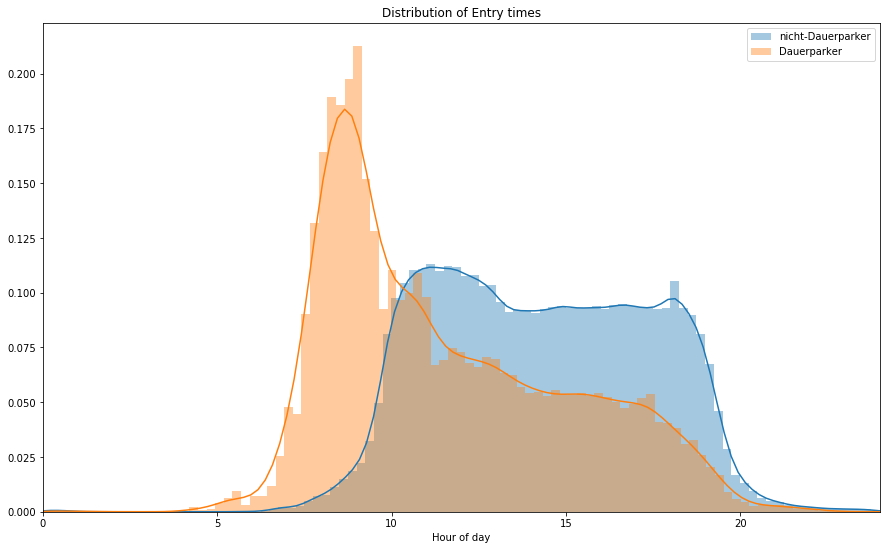

In [19]:
fig, ax = plt.subplots(figsize=(15,9))

sns.distplot(parkings[parkings['Category'] != 'Dauerparker']['EntryMFM'] / 60, bins=96, ax=ax)
sns.distplot(parkings[parkings['Category'] == 'Dauerparker']['EntryMFM'] / 60, bins=96, ax=ax)

ax.set_xlim((0,24))
ax.set_title('Distribution of Entry times')
ax.set_xlabel('Hour of day')
ax.legend(['nicht-Dauerparker', 'Dauerparker'])

plt.show()

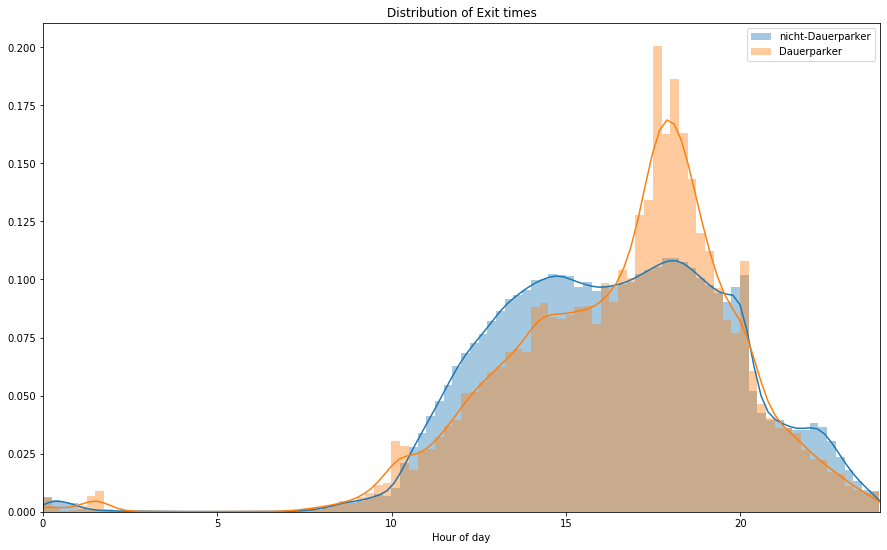

In [20]:
fig, ax = plt.subplots(figsize=(15,9))

sns.distplot(parkings[parkings['Category'] != 'Dauerparker']['ExitMFM'] / 60, bins=96, ax=ax)
sns.distplot(parkings[parkings['Category'] == 'Dauerparker']['ExitMFM'] / 60, bins=96, ax=ax)

ax.set_xlim((0,24))
ax.set_title('Distribution of Exit times')
ax.set_xlabel('Hour of day')
ax.legend(['nicht-Dauerparker', 'Dauerparker'])

plt.show()

## Distributions of parking duration

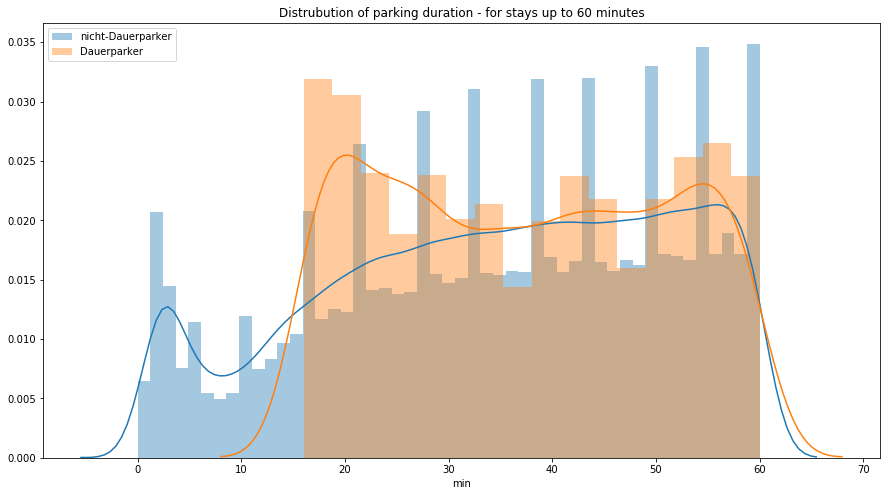

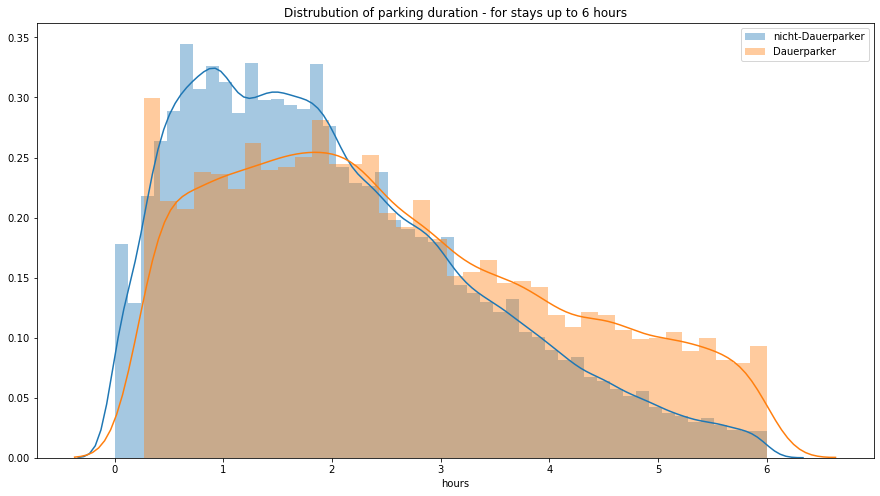

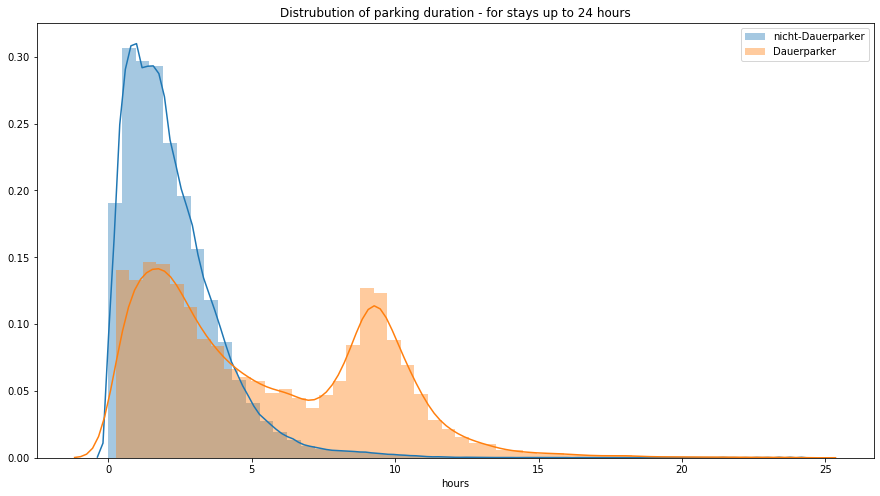

In [21]:
plt.figure(figsize=(15,8))
plt.title('Distrubution of parking duration - for stays up to 60 minutes')
sns.distplot(parkings[(parkings['Category'] != 'Dauerparker') & (parkings['MinutesStay'] <= 60)]['MinutesStay'])
sns.distplot(parkings[(parkings['Category'] == 'Dauerparker') & (parkings['MinutesStay'] <= 60)]['MinutesStay'])
plt.xlabel('min')
plt.legend(['nicht-Dauerparker', 'Dauerparker'])
plt.show()

plt.figure(figsize=(15,8))
plt.title('Distrubution of parking duration - for stays up to 6 hours')
sns.distplot(parkings[(parkings['Category'] != 'Dauerparker') & (parkings['MinutesStay'] <= 360)]['MinutesStay'] / 60)
sns.distplot(parkings[(parkings['Category'] == 'Dauerparker') & (parkings['MinutesStay'] <= 360)]['MinutesStay'] / 60)
plt.xlabel('hours')
plt.legend(['nicht-Dauerparker', 'Dauerparker'])
plt.show()

plt.figure(figsize=(15,8))
plt.title('Distrubution of parking duration - for stays up to 24 hours')
sns.distplot(parkings[(parkings['Category'] != 'Dauerparker') & (parkings['MinutesStay'] <= 24*60)]['MinutesStay']/60)
sns.distplot(parkings[(parkings['Category'] == 'Dauerparker') & (parkings['MinutesStay'] <= 24*60)]['MinutesStay']/60)
plt.xlabel('hours')
plt.legend(['nicht-Dauerparker', 'Dauerparker'])
plt.show()

## Parking Durations vs. Arrival Times

In [22]:
#plt.figure(figsize=(15,22))
#sns.scatterplot(parkings[parkings['Category'] == 'normal']['EntryDateTime'].dt.hour, parkings['HoursStay'], alpha = 0.5)
#sns.scatterplot(parkings[parkings['Category'] == 'Dauerparker']['EntryDateTime'].dt.hour, parkings['HoursStay'])
#sns.scatterplot(parkings[parkings['Category'] == 'Grace Time']['EntryDateTime'].dt.hour, parkings['HoursStay'])
#plt.ylim(0,96)
#plt.xlabel('Time of Arrival')
#plt.ylabel('Duration of Stay in hours')
#plt.legend(['nicht-Dauerparker', 'Dauerparker', 'Grace Period'])
#plt.show()

## Clusters of Parking Events

We use the following attributes to characterize a parking event (for now):
- Time of arrival (hour)
- Day of arrival (workday vs. weekend)
- Holiday y/n
- Parking duration
- Category
- (Event during parking duration in vicinity)

In [57]:
parkings = parking_combined_final

In [58]:
# Define list of holidays for DE

import holidays

holidays_ger = []

# Extract Holidays
for item in holidays.Germany(years=HOLIDAY_YEARS).items():
    holidays_ger.append(item[0])

# Add Christmas Eve and New Years Eve manually since it is not an official holiday
holidays_ger.append(datetime(year=2019, month=12, day=24).date())
holidays_ger.append(datetime(year=2019, month=12, day=31).date())


def weekday_flag (x):
    if x < 4:
        return 1
    else:
        return 0

def holiday_flag (x):
    
    x = pd.to_datetime(x).date()
    
    if x in holidays_ger:
        return 1
    else:
        return 0
    
def time_bucket_cat (x):
    
    hour = pd.to_datetime(x).hour
    
    if hour >= 6 and hour<10:
        return "Morning"
    if hour >= 10 and hour < 13:
        return "Pre-Lunchtime"
    if hour >= 13 and hour < 18:
        return "Afternoon"
    if hour >= 18 and hour < 22:
        return "Evening"
    else:
        return "Night"
    
def time_bucket_num (x):
    
    hour = pd.to_datetime(x).hour
    
    if hour >= 6 and hour<10:
        return 0
    if hour >= 10 and hour < 13:
        return 1
    if hour >= 13 and hour < 18:
        return 2
    if hour >= 18 and hour < 22:
        return 3
    else:
        return 0
    
    
def duration_bucket_cat (x):
    
    minutes = int(x)
    
    if minutes <= 30:
        return "Minimum stay"
    if minutes > 30 and minutes <= 2*60:
        return "Short stay"
    if minutes > 2*60 and minutes <= 6*60:
        return "Medium stay"
    if minutes > 6*60 and minutes <= 9*60:
        return "Workday stay"
    if minutes >9*60 and minutes <=12*60:
        return "Long workday stay"
    if minutes > 12*60:
        return "Long stay"

    
def duration_bucket_num (x):
    
    minutes = int(x)
    
    if minutes <= 30:
        return 0
    if minutes > 30 and minutes <= 2*60:
        return 1
    if minutes > 2*60 and minutes <= 6*60:
        return 2
    if minutes > 6*60 and minutes <= 9*60:
        return 3
    if minutes >9*60 and minutes <=12*60:
        return 4
    if minutes > 12*60:
        return 5
    
def quantilize_data (x,data_series,n_quantiles=5):

    quant_array = np.arange(1/n_quantiles,1,1/n_quantiles)
    
    quantiles = data_series.quantile(quant_array)

    for i in np.arange(len(quantiles)):

        if x <= quantiles.iloc[i]:
            y=i        
            break
        if x > quantiles.iloc[(len(quantiles)-1)]:
            y= (len(quantiles))
            break

        i+=1
    
    return y

In [59]:
#Create features

# limit parking duration to 48h

parkings = parkings[parkings["MinutesStay"]<48*60]

parkings["Entry_date"] = parkings["EntryDateTime"].apply(lambda x: x.date())

# Entry time
parkings["Entry_hour"] = parkings["EntryDateTime"].apply(lambda x: x.hour)
# time is circular; we can reperesent by sine and cosine tranformation (see: https://datascience.stackexchange.com/questions/8799/boundary-conditions-for-clustering)
parkings["Entry_hour_sin"] = parkings["Entry_hour"].apply(lambda t: np.sin(2*np.pi*(t/24)))
parkings["Entry_hour_cos"] = parkings["Entry_hour"].apply(lambda t: np.cos(2*np.pi*(t/24)))

parkings["Entry_min_sin"] = parkings["EntryMFM"].apply(lambda t: np.sin(2*np.pi*(t/(24*60))))
parkings["Entry_min_cos"] = parkings["EntryMFM"].apply(lambda t: np.cos(2*np.pi*(t/(24*60))))

parkings["Entry_bucket"] = parkings["EntryDateTime"].apply(lambda t: time_bucket_num(t))
#parkings["Entry_bucket"] = pd.Categorical(parkings["Entry_bucket"]).cat.codes


parkings["Duration_bucket"] = parkings["MinutesStay"].apply(lambda x: duration_bucket_num(x))
#parkings["Duration_bucket"] = pd.Categorical(parkings["Duration_bucket"]).cat.codes


# Exit time
parkings["Exit_hour"] = parkings["ExitDateTime"].apply(lambda x: x.hour)
# time is circular; we can reperesent by sine and cosine tranformation (see: https://datascience.stackexchange.com/questions/8799/boundary-conditions-for-clustering)
parkings["Exit_hour_sin"] = parkings["Exit_hour"].apply(lambda t: np.sin(2*np.pi*(t/24)))
parkings["Exit_hour_cos"] = parkings["Exit_hour"].apply(lambda t: np.cos(2*np.pi*(t/24)))

parkings["Exit_min_sin"] = parkings["ExitMFM"].apply(lambda t: np.sin(2*np.pi*(t/(24*60))))
parkings["Exit_min_cos"] = parkings["ExitMFM"].apply(lambda t: np.cos(2*np.pi*(t/(24*60))))

# Entry day
parkings["Entry_day"] = parkings["EntryDateTime"].apply(lambda x: x.weekday())    
parkings["Entry_weekday_yn"] = parkings["Entry_day"].apply(lambda x: weekday_flag(x))
parkings["Entry_holiday_yn"] = parkings["EntryDateTime"].apply(lambda x: holiday_flag(x)) # axis = 1 for row-wise on entire data frame

# encode category

#cat_dummies = pd.get_dummies(parkings[["Category"]],prefix="cat", drop_first=True)
#cat_dummies=cat_dummies.reset_index()
#parkings = parkings.reset_index()
#parkings = parkings.merge(cat_dummies,how="outer",on="index")


In [60]:
parkings.head()

,Sitename,Year,Month,Day,Hour,EntryDateTime,MinutesStay,HoursStay,RevenueAmount,ExitDateTime,...,Entry_bucket,Duration_bucket,Exit_hour,Exit_hour_sin,Exit_hour_cos,Exit_min_sin,Exit_min_cos,Entry_day,Entry_weekday_yn,Entry_holiday_yn
0,Bucerius Passage,2019,6,1,9,2019-06-01 09:14:00,96,1.600000,7.0,2019-06-01 10:50:00,...,0,1,10,0.500000,-0.866025,0.300706,-0.953717,5,0,0
1,Bucerius Passage,2019,6,1,9,2019-06-01 09:51:00,488,8.133333,30.0,2019-06-01 17:59:00,...,0,3,17,-0.965926,-0.258819,-0.999990,-0.004363,5,0,0
2,Bucerius Passage,2019,6,1,10,2019-06-01 10:47:00,52,0.866666,3.5,2019-06-01 11:39:00,...,1,1,11,0.258819,-0.965926,0.091502,-0.995805,5,0,0
3,Bucerius Passage,2019,6,1,11,2019-06-01 11:04:00,244,4.066666,17.5,2019-06-01 15:08:00,...,1,2,15,-0.707107,-0.707107,-0.731354,-0.681998,5,0,0
4,Bucerius Passage,2019,6,1,11,2019-06-01 11:21:00,221,3.683333,14.0,2019-06-01 15:02:00,...,1,2,15,-0.707107,-0.707107,-0.713250,-0.700909,5,0,0


In [61]:
parkings[parkings["Year"]==2020]["Month"].max()

7

### Population-level Visuals

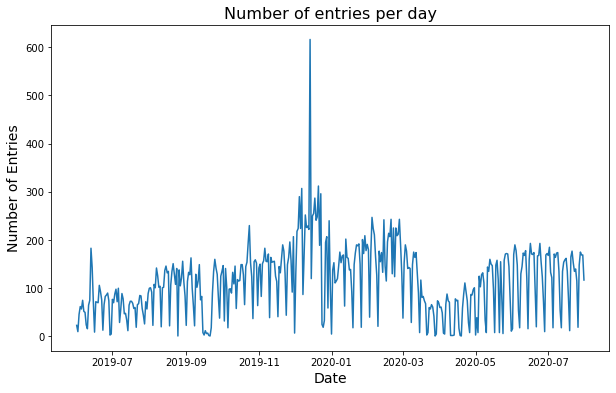

In [62]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(parkings.groupby("Entry_date").count()["MinutesStay"])

ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Number of Entries", fontsize=14)
ax.set_title("Number of entries per day", fontsize=16)

plt.savefig("Yearly_parking.pdf")

In [75]:
#parkings

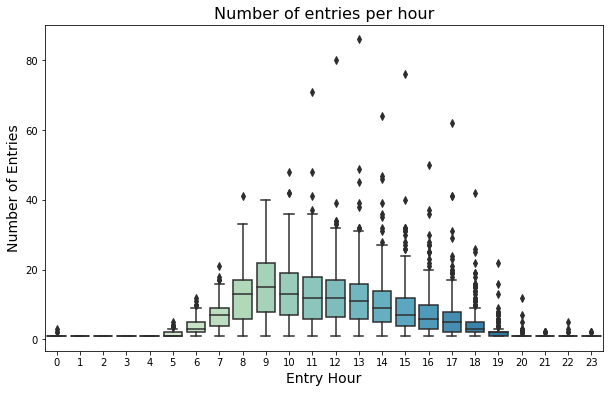

In [66]:
# hourly entries
fig, ax = plt.subplots(1,1,figsize=(10,6))

data = parkings[["MinutesStay","Entry_hour","Entry_date"]].groupby(["Entry_date","Entry_hour"]).agg({"MinutesStay":"count"})
data.reset_index(inplace=True)

sns.boxplot(x="Entry_hour",y="MinutesStay",data=data, ax=ax,palette="GnBu")

ax.set_xlabel("Entry Hour", fontsize=14)
ax.set_ylabel("Number of Entries", fontsize=14)
ax.set_title("Number of entries per hour", fontsize=16)


plt.savefig("Hourly_parking.pdf")

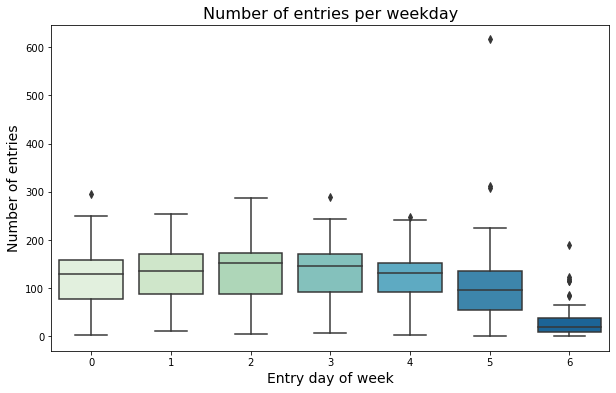

In [67]:
# hourly entries
fig, ax = plt.subplots(1,1,figsize=(10,6))

data = parkings[["MinutesStay","Entry_day","Entry_date"]].groupby(["Entry_date","Entry_day"]).agg({"MinutesStay":"count"})
data.reset_index(inplace=True)
#day_dict = {0:"MON",1:"TUE",2:"WED",3:"THU",4:"FRI",5:"SAT",6:"SUN"}
#data["Entry_day"] = data["Entry_day"].apply(lambda x: day_dict[x])


sns.boxplot(x="Entry_day",y="MinutesStay",data=data, ax=ax,palette="GnBu")

ax.set_xlabel("Entry day of week", fontsize=14)
ax.set_ylabel("Number of entries", fontsize=14)
ax.set_title("Number of entries per weekday", fontsize=16)

#ax.set_xticks(["MON","TUE","WED","THU","FRI","SAT","SUN"])


plt.savefig("Weekly_parking.pdf")

In [68]:
#data

In [69]:
# daily entries





In [70]:
# results visualization

def results_viz_no_cluster(data,var_1,var_2,var_3,legend=None,titles=None, name=None):
    
    plot_data = data

    fig, ax = plt.subplots(1,3,figsize=(18,9))
    
    # plot var 1

    
    sns.distplot(plot_data[var_1]/60, bins=96, ax=ax[0])

    ax[0].set_xlim((0,24))
    ax[0].set_xlabel('Hours')    
    
    if titles == None:
        ax[0].set_title('Distribution of {}'.format(var_1))
    else:
        ax[0].set_title('Distribution of {}'.format(titles[0]))
        
    # plot var 2    

    
    sns.distplot(plot_data[var_2], bins=96, ax=ax[1])
    
    ax[1].set_xlabel('Hours')
    ax[1].set_xlim((0,24))
    
    if titles == None:
        ax[1].set_title('Distribution of {}'.format(var_2))
    else:
        ax[1].set_title('Distribution of {}'.format(titles[1]))
    
    # plot var 3

    sns.distplot(plot_data[var_3]/60, bins=96, ax=ax[2])

    ax[2].set_xlim((0,24))
    ax[2].set_title('Distribution of {}'.format(var_3))
    ax[2].set_xlabel('Hours')
    
    if titles == None:
        ax[2].set_title('Distribution of {}'.format(var_3))
    else:
        ax[2].set_title('Distribution of {}'.format(titles[2]))
        
    if name==None:
        plt.show()
    else:
        plt.savefig("{}.pdf".format(name))
        plt.show()

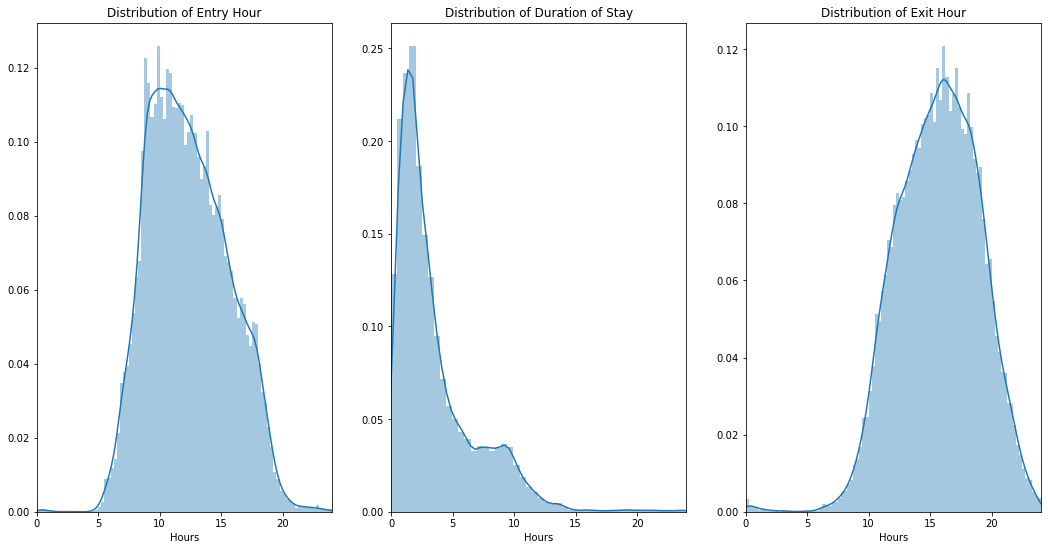

In [71]:
results_viz_no_cluster(parkings,"EntryMFM","HoursStay","ExitMFM",
                       titles=["Entry Hour","Duration of Stay", "Exit Hour"],name="Population_level_analysis") #

### Run Clustering Algo

- For simple non-categorical clustering k-means++ can be used
- For mixed categorical and continuous data k-modes and k-prototype is better. see here: https://pypi.org/project/kmodes/

`conda install -c conda-forge kmodes`

In [72]:
# results visualization

def results_viz(data,var_1,var_2,var_3,legend=None,titles=None, name=None):
    
    plot_data = data

    fig, ax = plt.subplots(1,3,figsize=(18,9))
    
    
    # plot var 1

    for c in plot_data["cluster_num"].unique():
        sns.distplot(plot_data[plot_data['cluster_num'] == c][var_1]/60, bins=96, ax=ax[0])

    ax[0].set_xlim((0,24))
    ax[0].set_xlabel('Hours')    
    
    if titles == None:
        ax[0].set_title('Distribution of {}'.format(var_1))
    else:
        ax[0].set_title('Distribution of {}'.format(titles[0]))
    
    if legend == None:
        ax[0].legend(plot_data["cluster_num"].unique())
    else:
        ax[0].legend(legend)
        
    # plot var 2    

    for c in plot_data["cluster_num"].unique():
        sns.distplot(plot_data[plot_data['cluster_num'] == c][var_2], bins=96, ax=ax[1])

    #ax[1].set_xlim((0,24))
    #ax[1].set_title('Distribution of {}'.format(var_2))
    ax[1].set_xlabel('Hours')
    
    if titles == None:
        ax[1].set_title('Distribution of {}'.format(var_2))
    else:
        ax[1].set_title('Distribution of {}'.format(titles[1]))
    
    if legend == None:
        ax[1].legend(plot_data["cluster_num"].unique())
    else:
        ax[1].legend(legend)
        
    
    # plot var 3

    for c in plot_data["cluster_num"].unique():
        sns.distplot(plot_data[plot_data['cluster_num'] == c][var_3]/60, bins=96, ax=ax[2])

    ax[2].set_xlim((0,24))
    ax[2].set_title('Distribution of {}'.format(var_3))
    ax[2].set_xlabel('Hours')
    
    if titles == None:
        ax[2].set_title('Distribution of {}'.format(var_3))
    else:
        ax[2].set_title('Distribution of {}'.format(titles[2]))

    if legend == None:
        ax[2].legend(plot_data["cluster_num"].unique())
    else:
        ax[2].legend(legend)
        
    if name==None:
        plt.show()
    else:
        plt.savefig("{}.pdf".format(name))
        plt.show()

In [73]:
#results_viz(parkings_cluster_kmeans)

## k-modes

In [343]:
feat_cat = ["Entry_hour"] #,"Entry_weekday_yn"


from kmodes.kmodes import KModes

# random categorical data
data = parkings[feat_cat]#np.random.choice(20, (100, 10))

#kmodes = KModes(n_clusters=5, init='Huang', n_init=5, verbose=1,n_jobs=4)

#labels = pd.DataFrame(kmodes.fit_predict(data),columns=["cluster_num"]).reset_index()
#labels["cluster_num"] = labels["cluster_num"].apply(lambda x: "Cluster_"+str(x))
#parkings_cluster_kmodes=parkings.merge(labels,on="index")

# Print the cluster centroids
#print(kmodes.cluster_centroids_)

In [344]:
#len(clusters)

## k-means

In [95]:
# select features and creat data set

#feat_full = ["Entry_hour","Exit_hour","Entry_weekday_yn","Entry_holiday_yn","HoursStay","cat_Grace Time","cat_normal"]
#feat_no_cat = ["Entry_hour","Exit_hour","Entry_weekday_yn","Entry_holiday_yn","HoursStay"]
#feat_min = ["Entry_hour","Entry_weekday_yn","Entry_holiday_yn","HoursStay"]

feat_no_cat = ["Entry_min_sin","Entry_min_cos","HoursStay"]

In [96]:
#select data
feat = feat_no_cat
data = parkings[feat]

# normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

parkings_scaled = scaler.fit_transform(data)
#parkings_scaled = data

In [13]:
#parkings_scaled

In [116]:
# Cluster

# test various k centers
#from sklearn.cluster import KMeans

#num_k =  []
#score= []

#for k in np.arange(1,21,1):
    
#    kmeans_test = KMeans(n_clusters=k, random_state=0, init="k-means++").fit(parkings_scaled)
    
#    num_k.append(k)
#    score.append(kmeans_test.score(parkings_scaled))

In [115]:
#score

NameError: name 'num_k' is not defined

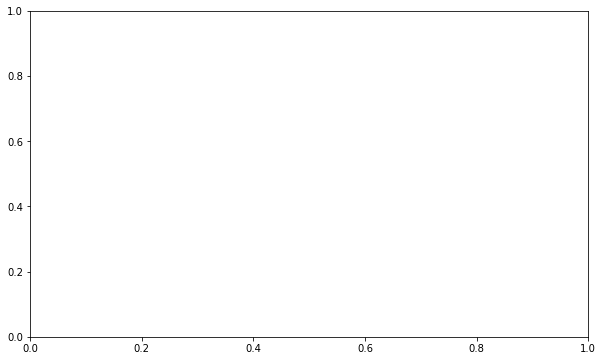

In [74]:
fig,ax = plt.subplots(figsize=(10,6))

ax.plot(num_k,score)
ax.set_xticks(num_k)


ax.set_title("Number of cluster centers vs. loss", fontsize=16)
ax.set_xlabel("Number of cluster k", fontsize=14)
ax.set_ylabel("Loss", fontsize=14)


plt.savefig("Cluster_centers.pdf")
plt.show()

In [76]:
np.arange(1,20,1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [97]:
# 5 or 7 looks good

n_clusters = 5

# cluster

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=n_clusters, random_state=None, init="k-means++",max_iter=10000).fit(parkings_scaled)

labels = pd.DataFrame(kmeans.labels_,columns=["cluster_num"]).reset_index()
scaled_data = pd.DataFrame(parkings_scaled,columns=feat).reset_index()
labels_df = labels.merge(scaled_data, on="index")

parkings_cluster_kmeans = parkings
parkings_cluster_kmeans["cluster_num"] = kmeans.predict(scaler.fit_transform(parkings_cluster_kmeans[feat]))

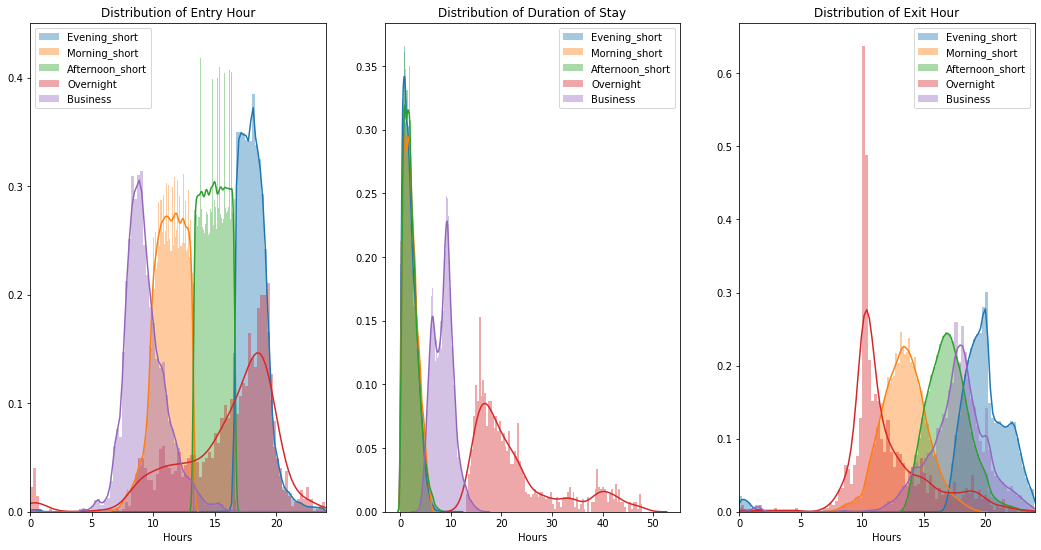

In [136]:
results_viz(parkings_cluster_kmeans,"EntryMFM","HoursStay","ExitMFM",
            titles=["Entry Hour","Duration of Stay", "Exit Hour"], 
            legend=["Evening_short","Morning_short","Afternoon_short","Overnight","Business"]
            ) 

In [132]:
# name clusters

cluster_dict = {"1":"Evening_short","2":"Morning_short","4":"Afternoon_short","0":"Overnight","3":"Business"}

In [147]:
parkings_cluster_kmeans[parkings_cluster_kmeans["Entry_weekday_yn"]==1].groupby("cluster_num").count()[["Entry_hour"]] #Entry_weekday_yn

,Entry_hour
cluster_num,
0,759
1,52857
2,77460
3,21115
4,57402


In [150]:
weekend = parkings_cluster_kmeans[parkings_cluster_kmeans["Entry_weekday_yn"]==0].groupby("cluster_num").count()[["Entry_hour"]]

In [152]:
weekend["type"] = "weekend"

In [154]:
weekday = parkings_cluster_kmeans[parkings_cluster_kmeans["Entry_weekday_yn"]==1].groupby("cluster_num").count()[["Entry_hour"]]
weekday["type"] = "weekday"

In [157]:
full = parkings_cluster_kmeans.groupby("cluster_num").count()[["Entry_hour"]]
full["type"] = "full sample"

In [155]:
test = weekend.append(weekday)

In [158]:
test = test.append(full)

In [160]:
test_final = test.reset_index()

In [167]:
test_final["cluster_name"] = test_final["cluster_num"].apply(lambda x: cluster_dict[str(x)])
test_final["cluster_num"] = test_final["cluster_num"].apply(lambda x: int(x)) 

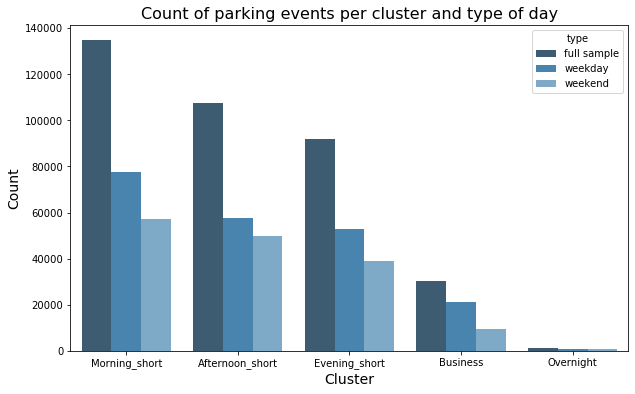

In [189]:
fig, ax = plt.subplots(1,1,figsize=(10,6))

sns.barplot(x="cluster_name",y="Entry_hour", data= test_final, hue="type", 
            order=["Morning_short", "Afternoon_short", "Evening_short", "Business", "Overnight"], 
            hue_order=["full sample","weekday","weekend"], ax=ax,palette="Blues_d")

ax.set_ylabel("Count", fontsize=14)
ax.set_xlabel("Cluster", fontsize=14)
ax.set_title("Count of parking events per cluster and type of day", fontsize=16)

plt.savefig("Counts.pdf")

### DBSCAN

In [ ]:
# DBSCAN

from sklearn.cluster import DBSCAN


dbscan = DBSCAN(eps=0.01).fit(data)


In [ ]:
# collect labels and merge with original data
labels = pd.DataFrame(dbscan.labels_,columns=["cluster_num"]).reset_index()
labels["cluster_num"] = labels["cluster_num"].apply(lambda x: "Cluster_"+str(x))

parkings_cluster_dbscan=parkings.merge(labels,on="index")

### Hierarchichal

In [ ]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 4

hierarchical = AgglomerativeClustering(distance_threshold=None, n_clusters=n_clusters).fit(data)

# collect labels and merge with original data
labels = pd.DataFrame(hierarchical.labels_,columns=["cluster_num"]).reset_index()
labels["cluster_num"] = labels["cluster_num"].apply(lambda x: "Cluster_"+str(x))

parkings_cluster_hiera=parkings.merge(labels,on="index")

## Total occupation

**Problem**: Datensatz startet ja nicht mit 0 Fahrzeugen im Parkhausm - **Assumption**: Levelt sich nach zwei, drei Tagen spätestens aus.

### absolutes over the year of 2019

In [115]:
index = pd.date_range('1/1/2019', periods=105120, freq='5min') # 365*24*60/5 = 105.120
occupation_year = pd.DataFrame(index=index)

# entries
occupation = pd.DataFrame()
occupation['entry'] = parkings[parkings['Category'] == 'normal']['EntryDateTime'].dt.round('5min')
occupation['counton'] = range(0,len(occupation['entry']))
occupation = occupation.groupby('entry')['counton'].nunique()

occupation_year = pd.merge(occupation_year, occupation, how='left', left_on=occupation_year.index, right_on=occupation.index)
occupation_year.set_index('key_0', inplace=True)

# exits
occupation = pd.DataFrame()
occupation['exit'] = parkings[parkings['Category'] == 'normal']['ExitDateTime'].dt.round('5min')
occupation['counton'] = range(0,len(occupation['exit']))
occupation = occupation.groupby('exit')['counton'].nunique()

occupation_year = pd.merge(occupation_year, occupation, how='left', left_on=occupation_year.index, right_on=occupation.index)
occupation_year.set_index('key_0', inplace=True)
occupation_year.rename({'counton_x': 'entries', 'counton_y': 'exits'}, axis=1, inplace=True)

# entries - Dauerparker
occupation = pd.DataFrame()
occupation['entry'] = parkings[parkings['Category'] == 'Dauerparker']['EntryDateTime'].dt.round('5min')
occupation['counton'] = range(0,len(occupation['entry']))
occupation = occupation.groupby('entry')['counton'].nunique()

occupation_year = pd.merge(occupation_year, occupation, how='left', left_on=occupation_year.index, right_on=occupation.index)
occupation_year.set_index('key_0', inplace=True)

# exits - Dauerparker
occupation = pd.DataFrame()
occupation['exit'] = parkings[parkings['Category'] == 'Dauerparker']['ExitDateTime'].dt.round('5min')
occupation['counton'] = range(0,len(occupation['exit']))
occupation = occupation.groupby('exit')['counton'].nunique()

occupation_year = pd.merge(occupation_year, occupation, how='left', left_on=occupation_year.index, right_on=occupation.index)
occupation_year.set_index('key_0', inplace=True)
occupation_year.rename({'counton_x': 'entries_dauerparker', 'counton_y': 'exits_dauerparker'}, axis=1, inplace=True)

occupation_year.index.rename('datetime', inplace = True)
occupation_year.fillna(0, inplace = True)

occupation_year['net'] = 0
occupation_year['net_dauerparker'] = 0
for index in range(1, len(occupation_year)):
    occupation_year.iloc[index, 4] = occupation_year.iloc[index-1, 4] + occupation_year.iloc[index-1, 0] - occupation_year.iloc[index-1, 1]
    occupation_year.iloc[index, 5] = occupation_year.iloc[index-1, 5] + occupation_year.iloc[index-1, 2] - occupation_year.iloc[index-1, 3]

In [116]:
occupation_year.to_pickle('Koebogen_net_occupation2019.pkl')
occupation_year.head(20)

,entries,exits,entries_dauerparker,exits_dauerparker,net,net_dauerparker
datetime,,,,,,
2019-01-01 00:00:00,1.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 00:05:00,1.0,0.0,0.0,0.0,1.0,0.0
2019-01-01 00:10:00,0.0,0.0,0.0,0.0,2.0,0.0
2019-01-01 00:15:00,2.0,0.0,0.0,0.0,2.0,0.0
2019-01-01 00:20:00,3.0,0.0,0.0,0.0,4.0,0.0
2019-01-01 00:25:00,0.0,0.0,0.0,0.0,7.0,0.0
2019-01-01 00:30:00,0.0,0.0,0.0,0.0,7.0,0.0
2019-01-01 00:35:00,1.0,0.0,0.0,0.0,7.0,0.0
2019-01-01 00:40:00,1.0,0.0,0.0,0.0,8.0,0.0


In [118]:
occupation_year["net_total"] = occupation_year["net"]+occupation_year["net_dauerparker"]

In [117]:
#plt.figure(figsize=(15,7))
#plt.title('Stacked (normal and Dauerparker) net occupation of the parking garage, resolution: 5min')
#plt.stackplot(occupation_year.index, occupation_year['net_dauerparker'], occupation_year['net'])
#plt.show()

### distribution over a day

#### mean

In [119]:
occupation_year.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105120 entries, 2019-01-01 00:00:00 to 2019-12-31 23:55:00
Data columns (total 7 columns):
entries                105120 non-null float64
exits                  105120 non-null float64
entries_dauerparker    105120 non-null float64
exits_dauerparker      105120 non-null float64
net                    105120 non-null float64
net_dauerparker        105120 non-null float64
net_total              105120 non-null float64
dtypes: float64(7)
memory usage: 6.4 MB


In [123]:
#occupation_year.reset_index(inplace=True)
occupation_year["hour"] = occupation_year["datetime"].apply(lambda x: pd.to_datetime(x).hour)
occupation_day_mean = occupation_year[["hour","net_total"]].groupby('hour').mean()
occupation_day_mean.reset_index(inplace=True)

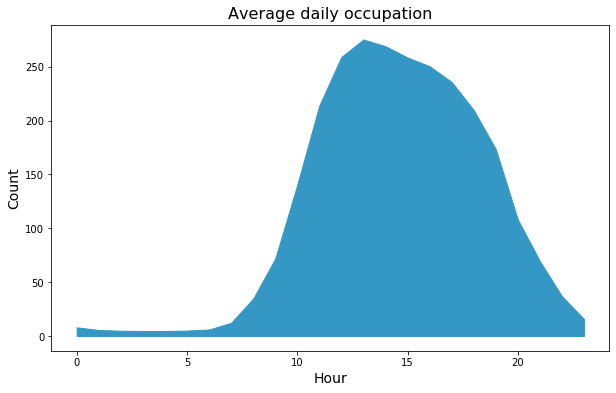

In [139]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.stackplot(occupation_day_mean["hour"], occupation_day_mean['net_total'],color=sns.color_palette("GnBu")[4])
#plt.xticks(['00:00', '06:00', '12:00', '18:00', '24:00'])
#plt.legend(['Dauerparker', 'normal'])
#plt.title('Stacked (Dauerparker and others) mean occupation of the parking garage over a day')
ax.set_ylabel("Count", fontsize=14)
ax.set_xlabel("Hour", fontsize=14)
ax.set_title("Average daily occupation", fontsize=16)

plt.savefig("Occupation.pdf")
plt.show()

#### max

In [ ]:
plt.figure(figsize=(15,8))
occupation_day = occupation_year[['net', 'net_dauerparker']]
occupation_day['HHMM'] = occupation_day.index.strftime('%H%M')
occupation_day_max = occupation_day.groupby('HHMM').max()
occupation_day_max.set_index(pd.to_datetime(occupation_day_max.index, format='%H%M').strftime('%H:%M'), inplace=True)
plt.stackplot(occupation_day_mean.index, occupation_day_max['net_dauerparker'], occupation_day_max['net'])
plt.xticks(['00:00', '06:00', '12:00', '18:00', '24:00'])
plt.legend(['Dauerparker', 'normal'])
plt.title('Stacked (Dauerparker and others) max occupation of the parking garage over a day')
plt.show()